<a href="https://colab.research.google.com/github/jagadish9084/learnbay-ds-ml-course/blob/main/data-cleaning/india_crime_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib.ticker
import seaborn as sns
import warnings
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report

warnings.filterwarnings('ignore')

In [39]:
#Load the raw crime
data  =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/learnbay-ds-ml-course/datasets/crime_dataset_india.csv')


# Explore the data
Display first few rows of the data frame to undestand the structure

In [40]:
data.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [42]:
print(f'Column names: {data.columns}')

Column names: Index(['Report Number', 'Date Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed'],
      dtype='object')


In [43]:
print(f'Shape: {data.shape}')

Shape: (40160, 14)


# Data Preprocessing:

Pre process the data to make it suitable for analysis. This included handling missing data, converting date columns to datetime objects, and renaming the columns.

In [44]:
# Rename the Columns to snake case
data.columns = data.columns.map(lambda cname : cname.lower().replace(' ','_'))
print(f'Column names: {data.columns}')

Column names: Index(['report_number', 'date_reported', 'date_of_occurrence',
       'time_of_occurrence', 'city', 'crime_code', 'crime_description',
       'victim_age', 'victim_gender', 'weapon_used', 'crime_domain',
       'police_deployed', 'case_closed', 'date_case_closed'],
      dtype='object')


In [45]:
# Function to convert the date columns to datetime object
def str_to_date_time(date_str):
  valid_date_time = ["%d-%m-%Y %H:%M", "%d/%m/%Y %H:%M", "%m-%d-%Y %H:%M", "%m/%d/%Y %H:%M"]
  if date_str is not None:
    for fmt in valid_date_time:
      try:
        return pd.Timestamp(date_str)
      except:
        continue
  return pd.NaT

In [46]:
#Convert the date columns to datetime object
data.date_reported = data.date_reported.apply(str_to_date_time)
data.date_of_occurrence = data.date_of_occurrence.apply(str_to_date_time)
data.time_of_occurrence = data.time_of_occurrence.apply(str_to_date_time)
data.date_case_closed = data.date_case_closed.apply(str_to_date_time)

In [47]:
# Drop implicit index and make date_of_occurrence col as index
data.set_index("date_of_occurrence", inplace=True)
data.head()

,report_number,date_reported,time_of_occurrence,city,crime_code,crime_description,victim_age,victim_gender,weapon_used,crime_domain,police_deployed,case_closed,date_case_closed
date_of_occurrence,,,,,,,,,,,,,
2020-01-01 00:00:00,1,2020-02-01 00:00:00,2020-01-01 01:11:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT
2020-01-01 01:00:00,2,2020-01-01 19:00:00,2020-01-01 06:26:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT
2020-01-01 02:00:00,3,2020-02-01 05:00:00,2020-01-01 14:30:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT
2020-01-01 03:00:00,4,2020-01-01 05:00:00,2020-01-01 14:46:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00
2020-01-01 04:00:00,5,2020-01-01 21:00:00,2020-01-01 16:51:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-08-01 21:00:00


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40160 entries, 2020-01-01 00:00:00 to 2024-07-31 07:00:00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   report_number       40160 non-null  int64         
 1   date_reported       40160 non-null  datetime64[ns]
 2   time_of_occurrence  40160 non-null  datetime64[ns]
 3   city                40160 non-null  object        
 4   crime_code          40160 non-null  int64         
 5   crime_description   40160 non-null  object        
 6   victim_age          40160 non-null  int64         
 7   victim_gender       40160 non-null  object        
 8   weapon_used         34370 non-null  object        
 9   crime_domain        40160 non-null  object        
 10  police_deployed     40160 non-null  int64         
 11  case_closed         40160 non-null  object        
 12  date_case_closed    20062 non-null  datetime64[ns]
dtypes: datetime

In [49]:
# Find Missing values
data.isna().sum()

,0
report_number,0
date_reported,0
time_of_occurrence,0
city,0
crime_code,0
crime_description,0
victim_age,0
victim_gender,0
weapon_used,5790
crime_domain,0


In [50]:
#Handle missing values for weapon_used column
data.weapon_used.fillna('Unknown', inplace=True)

In [51]:
#Handle missing values for date_case_closed column
# If case is closed and and close date is unknow then update todays date as closed date
print(f'Unique values for case closed : {data.case_closed.unique()}')
data[data.case_closed=='Yes'].date_case_closed.isna().sum()

Unique values for case closed : ['No' 'Yes']


0

In [52]:
# Verify missing values after handling missing values
data.isna().sum()

,0
report_number,0
date_reported,0
time_of_occurrence,0
city,0
crime_code,0
crime_description,0
victim_age,0
victim_gender,0
weapon_used,0
crime_domain,0


In [53]:
#Handle duplicates
print(f'Number of duplicate rows :{data.duplicated().sum()}')
#There are no duplicate rows hence no need to drop any rows

Number of duplicate rows :0


# Exploratory Data Analysis (EDA)

Let's explore the data to find interesting patterns and insights.


In [54]:
sns.set()

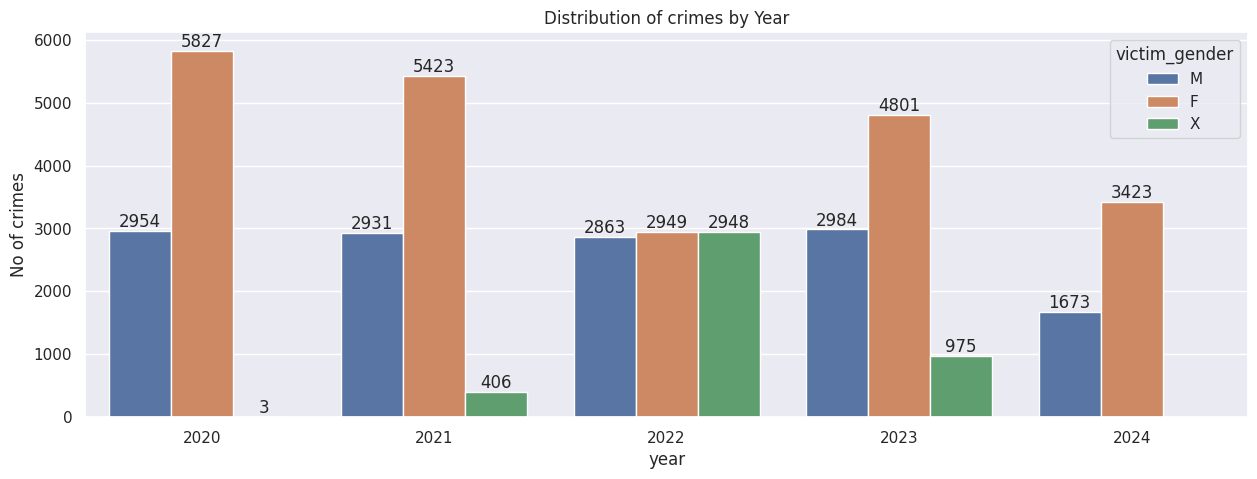

In [55]:
# Plot Distribution of crimes by Year and Gender
data_copy=data.copy()
data_copy['year'] = data_copy.index.year.astype('string')
f, ax = plt.subplots(1,1, figsize=(15,5))
ax.set_title('Distribution of crimes by Year')
sns.countplot(ax = ax, data= data_copy, x = 'year', hue='victim_gender')
ax.set_ylabel('No of crimes')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.bar_label(container=ax.containers[2])
f.show()


The above graph indicates that crime rate is same across the year befor dropping drastically in 2024




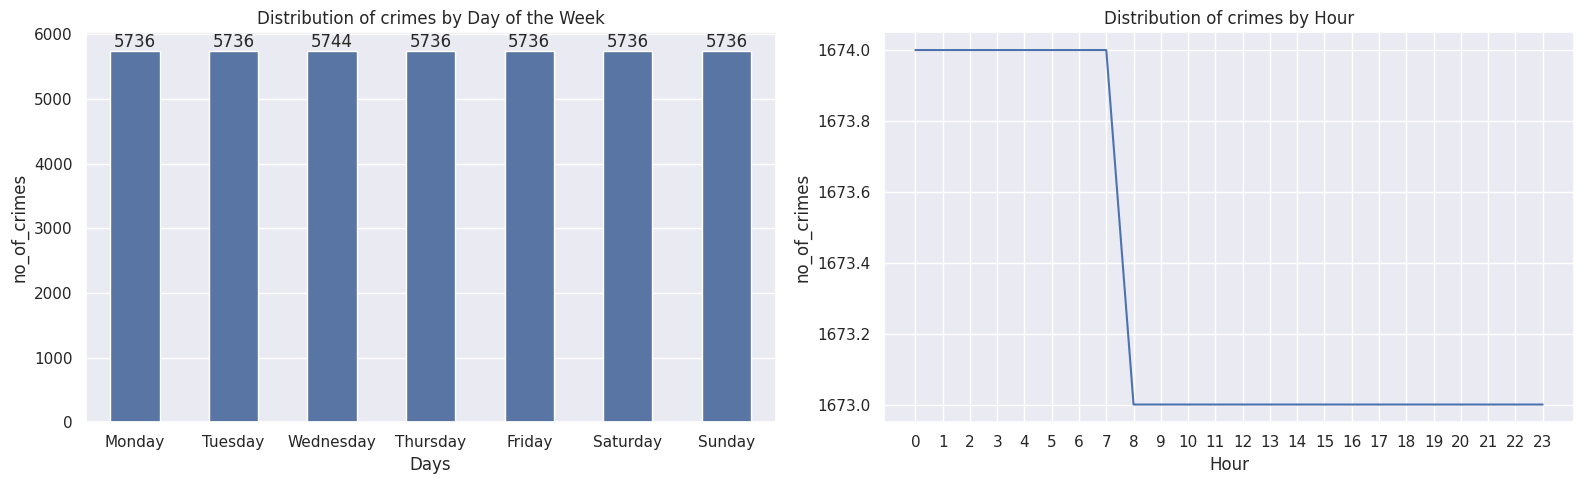

In [56]:
from os import name
# Plot Distribution of crimes by day of the week
day_wise_data= data.resample('D').size().reset_index(name='no_of_crimes')
day_wise_data['day_name'] = day_wise_data.date_of_occurrence.dt.day_name()
day_wise_data['day_of_week'] = day_wise_data.date_of_occurrence.dt.day_of_week
day_wise_data = day_wise_data.groupby(['day_of_week','day_name'])['no_of_crimes'].sum().reset_index(name='no_of_crimes')
f, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].set_title('Distribution of crimes by Day of the Week')
ax[0].set_xlabel('Days')
sns.barplot(ax=ax[0] , data=day_wise_data, x= 'day_name', y = 'no_of_crimes', width = 0.5)
ax[0].bar_label(ax[0].containers[0], padding=0.1)

# Distribution of crimes by Hour
hour_wise_data = data.resample('H').size().reset_index(name='no_of_crimes')
hour_wise_data['time'] = hour_wise_data.date_of_occurrence.dt.time.astype('string')
hour_wise_data = hour_wise_data.groupby(['time'])['no_of_crimes'].sum().reset_index(name='no_of_crimes')

ax[1].set_title('Distribution of crimes by Hour')
ax[1].set_xlabel('Hour')
sns.lineplot(ax = ax[1], data=hour_wise_data,x=hour_wise_data.index, y='no_of_crimes')
plt.xticks(range(0,24,1))
f.tight_layout()
f.show()


The above graph indicates that crime rate is same for all the days of the weeks

The above graph indicates that the crime rate is more between midnight 12 AM to 8 AM

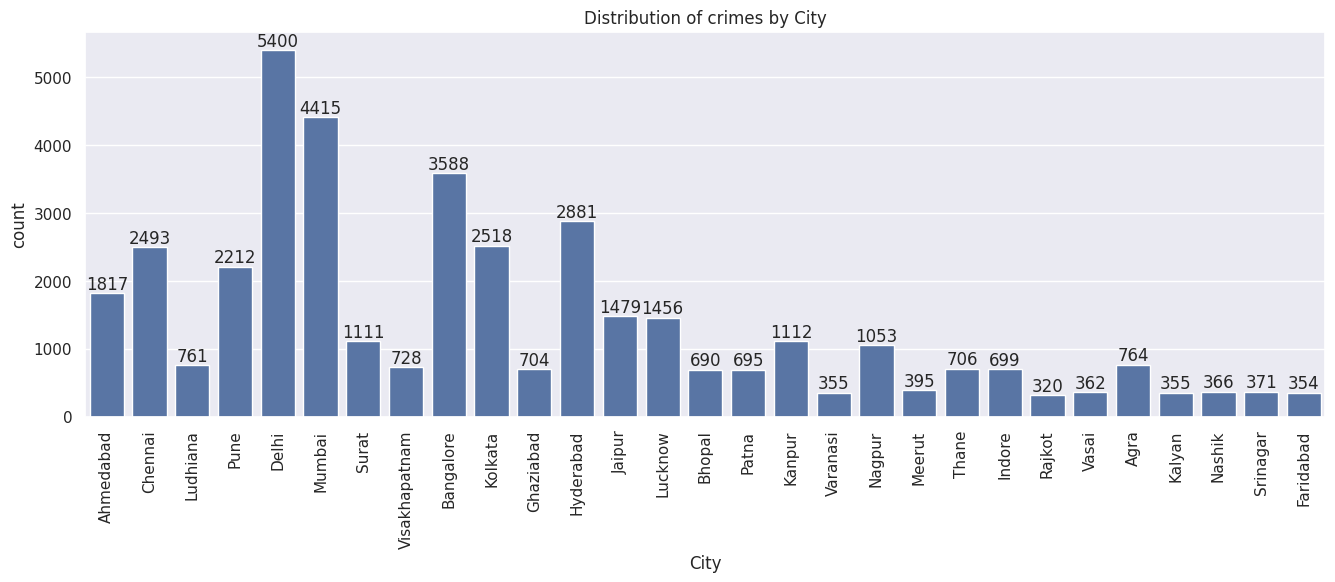

In [57]:
# Distribution of crimes by City
categories = ['city', 'crime_description', 'crime_domain', 'weapon_used', 'victim_gender']
# Crime by Cities
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(ax=ax,data=data, x='city')
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Distribution of crimes by City')
ax.set_xlabel('City')
ax.bar_label(ax.containers[0])
fig.show()

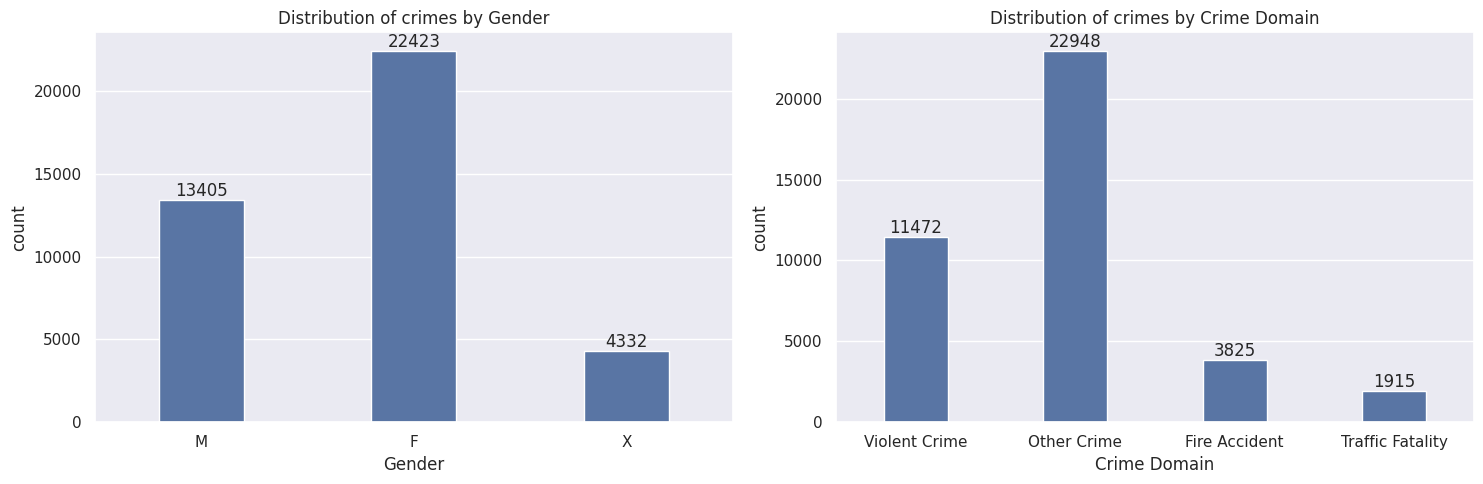

In [58]:
#Crime by Gender
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=ax[0],data=data, x='victim_gender', width=0.4)
ax[0].tick_params(axis='x')
ax[0].set_title('Distribution of crimes by Gender')
ax[0].set_xlabel('Gender')
ax[0].bar_label(ax[0].containers[0])

#Crimes by Crime Domain
sns.countplot(ax=ax[1],data=data, x='crime_domain', width=0.4)
ax[1].tick_params(axis='x')
ax[1].set_title('Distribution of crimes by Crime Domain')
ax[1].set_xlabel('Crime Domain')
ax[1].bar_label(ax[1].containers[0])
fig.tight_layout()
fig.show()

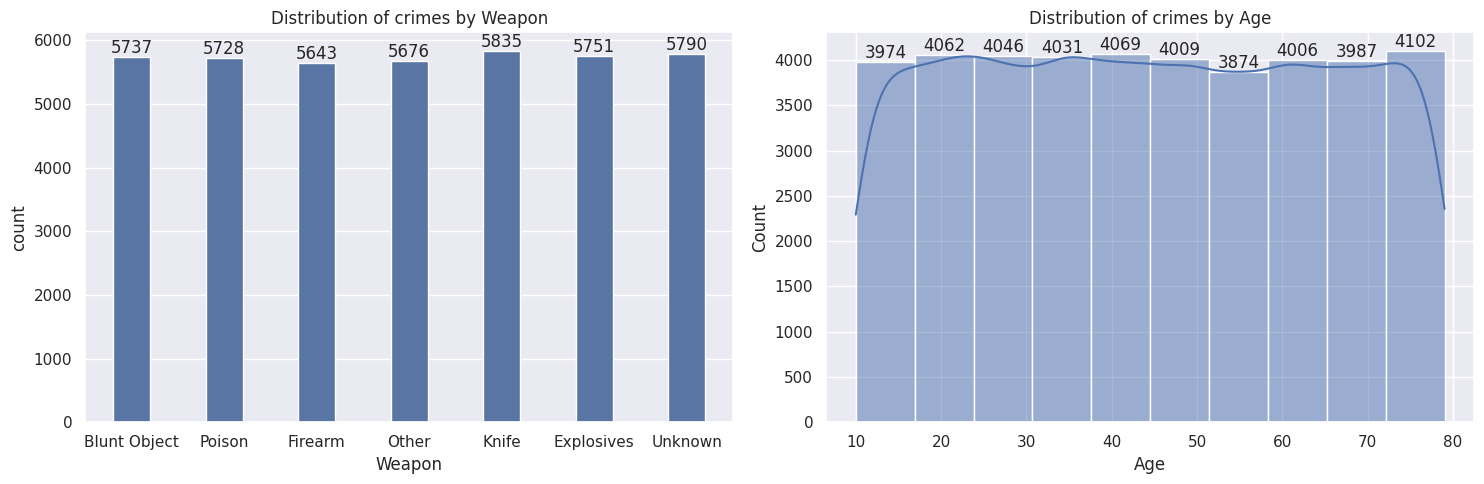

In [59]:
 #Crime by Crime Domain
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(ax=ax[1],data=data, x='victim_age', kde=True, stat='count', bins=10)
ax[1].tick_params(axis='x')
ax[1].set_title('Distribution of crimes by Age')
ax[1].set_xlabel('Age')
ax[1].bar_label(ax[1].containers[0])

#Crime by Weapon
sns.countplot(ax=ax[0],data=data, x='weapon_used', width=0.4)
ax[0].tick_params(axis='x')
ax[0].set_title('Distribution of crimes by Weapon')
ax[0].set_xlabel('Weapon')
ax[0].bar_label(ax[0].containers[0])
fig.tight_layout()
fig.show()

# Build Case clouser predication model

In [60]:
# Create copy of the data to build model
data_copy = data.copy()
data_copy['no_of_days_taken_to_report_case'] = (data.date_reported - data.time_of_occurrence).dt.days
#Cut the date time varibale into four variable year, month, day, and hour

data_copy.drop(['time_of_occurrence','date_reported','report_number','date_case_closed','crime_code'],axis=1, inplace=True)
# Drop date_of_occurrence and Reset _index
data_copy.reset_index(drop=True, inplace=True)
data.head()

,report_number,date_reported,time_of_occurrence,city,crime_code,crime_description,victim_age,victim_gender,weapon_used,crime_domain,police_deployed,case_closed,date_case_closed
date_of_occurrence,,,,,,,,,,,,,
2020-01-01 00:00:00,1,2020-02-01 00:00:00,2020-01-01 01:11:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT
2020-01-01 01:00:00,2,2020-01-01 19:00:00,2020-01-01 06:26:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT
2020-01-01 02:00:00,3,2020-02-01 05:00:00,2020-01-01 14:30:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT
2020-01-01 03:00:00,4,2020-01-01 05:00:00,2020-01-01 14:46:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00
2020-01-01 04:00:00,5,2020-01-01 21:00:00,2020-01-01 16:51:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-08-01 21:00:00


In [61]:
# Encode the data
data_copy = pd.get_dummies(data_copy, dtype=int)

#Rename the columns
data_copy.columns = data_copy.columns.str.replace('city_','').str.replace('crime_description_','').str.replace('weapon_used_','').str.replace('crime_domain_','')

#Remove column corresponding to unknow gender
data_copy.drop(['victim_gender_X'], axis=1, inplace=True)
data_copy.columns = data_copy.columns.str.replace('-','').str.replace(' ','_').str.lower()
data_copy.drop(['case_closed_no','unknown'], axis=1, inplace=True)


In [62]:
# Split features and target variable
y = data_copy['case_closed_yes']
x = data_copy.drop(['case_closed_yes'], axis=1)

In [63]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#Dimention of the split
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(28112, 65) (12048, 65)
(28112,) (12048,)


Training Accuracy : 73.18 %
Testing Accuracy of the model: 49.9 %
Precision Score of the model: 49.88 %
Recall Score of the model: 49.05 %
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50      6026
           1       0.50      0.49      0.49      6022

    accuracy                           0.50     12048
   macro avg       0.50      0.50      0.50     12048
weighted avg       0.50      0.50      0.50     12048



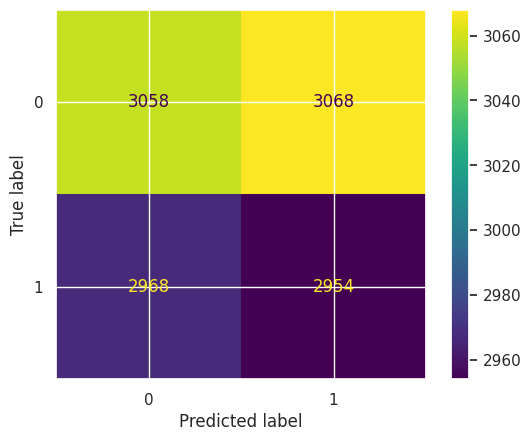

In [64]:
#Build DecisionTreeClassifier model
classifier = DecisionTreeClassifier(random_state=42, max_depth=None, min_samples_leaf = 2, min_samples_split= 32)
classifier.fit(x_train, y_train)

training_score = classifier.score(x_train, y_train)*100
print(f'Training Accuracy : {round(training_score, 2)}','%')

#Prediction
y_pred = classifier.predict(x_test)

#Check the accuracy of the predication
cm = ConfusionMatrixDisplay.from_predictions(y_pred, y_test)
print(f'Testing Accuracy of the model: {round(accuracy_score(y_pred=y_pred, y_true=y_test)*100, 2)}','%')
print(f'Precision Score of the model: {round(precision_score(y_pred=y_pred, y_true=y_test)*100, 2)}','%')
print(f'Recall Score of the model: {round(recall_score(y_pred=y_pred, y_true=y_test)*100, 2)}','%')
print(f'Classification Report:\n {classification_report(y_pred=y_pred, y_true=y_test)}')

In [65]:
# Tunning model to find best parameter for traing
est = DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth':[None, 2, 4, 8, 16, 64], 'min_samples_split':[2, 4, 8, 16, 32], 'min_samples_leaf':[1, 2, 4, 8, 16]}
gs = GridSearchCV(estimator=est, param_grid=param_grid, cv=5,  n_jobs= -1, verbose=True)
gs.fit(x_train, y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 8, 16, 64],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16, 32]},
             verbose=True)

In [66]:
print(f'Best param for traing the model : {gs.best_params_}')
print(f'Best param for traing the model : {gs.best_score_}')

Best param for traing the model : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 32}
Best param for traing the model : 0.5044823273422233
